In [1]:
import molsysmt as msm
from molsysmt import pyunitwizard as puw
import omembrane as omem
import openmm as mm
from openmm import unit as u
import numpy as np
import math
from matplotlib import pyplot as plt
from tqdm import tqdm

from openmm import LocalEnergyMinimizer

In [2]:
molsys = msm.convert('memb_popc_100_stage_2_2.h5msm')

In [3]:
P_atoms = msm.select(molsys, selection='atom_type=="P" and molecule_type=="lipid"')
N_atoms = msm.select(molsys, selection='atom_type=="N" and molecule_type=="lipid"')
O_atoms = msm.select(molsys, selection='atom_type=="O" and molecule_type=="lipid"')
C_atoms = msm.select(molsys, selection='atom_type=="C" and molecule_type=="lipid"')
NPO_atoms = msm.select(molsys, selection='atom_type==["P","N","O"] and molecule_type=="lipid"')

OW_atoms = msm.select(molsys, selection='atom_type=="O" and molecule_type=="water"')

In [4]:
context = msm.convert(molsys, 'openmm.Context', platform='CUDA')

In [5]:
msm.thirds.openmm.forces.harmonic_potential_to_plane(context, selection=NPO_atoms,
                                                     force_constant=5000.0*u.kilojoules_per_mole/(u.nanometer**2),
                                                     vector=[0,0,1], pbc=True,
                                                     adding_force=True)

5

In [6]:
state_init = context.getState(getPositions=True)

In [7]:
msm.molecular_mechanics.get_potential_energy(context)

<Quantity(-805724.165, 'kilojoule / mole')>

In [8]:
LocalEnergyMinimizer.minimize(context)

In [9]:
msm.molecular_mechanics.get_potential_energy(context)

<Quantity(-815477.411, 'kilojoule / mole')>

In [10]:
state_end = context.getState(getPositions=True)

/fast_data/home/diego/miniconda3/envs/OMembrane@uibcdf_3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


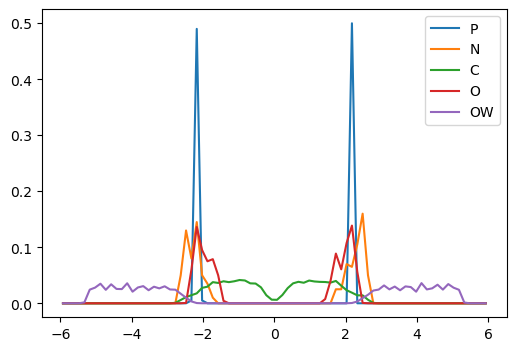

In [11]:
bins_edges_P_init, density_P_init = omem.analysis.get_lineal_density(molsys, selection = P_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)
bins_edges_N_init, density_N_init = omem.analysis.get_lineal_density(molsys, selection = N_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)
bins_edges_C_init, density_C_init = omem.analysis.get_lineal_density(molsys, selection = C_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)
bins_edges_O_init, density_O_init = omem.analysis.get_lineal_density(molsys, selection = O_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)
bins_edges_OW_init, density_OW_init = omem.analysis.get_lineal_density(molsys, selection=OW_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)


plt.rcParams["figure.figsize"] = (6,4)
plt.plot((bins_edges_P_init[1:]+bins_edges_P_init[:-1])/2, density_P_init, label='P')
plt.plot((bins_edges_N_init[1:]+bins_edges_N_init[:-1])/2, density_N_init, label='N')
plt.plot((bins_edges_C_init[1:]+bins_edges_C_init[:-1])/2, density_C_init, label='C')
plt.plot((bins_edges_O_init[1:]+bins_edges_O_init[:-1])/2, density_O_init, label='O')
plt.plot((bins_edges_OW_init[1:]+bins_edges_OW_init[:-1])/2, density_OW_init, label='OW')
plt.legend()

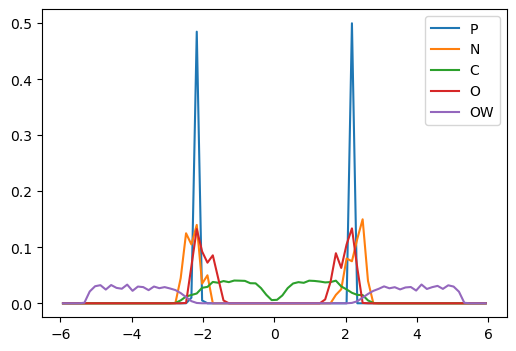

In [12]:
bins_edges_P_end, density_P_end = omem.analysis.get_lineal_density(state_end, selection = P_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)
bins_edges_N_end, density_N_end = omem.analysis.get_lineal_density(state_end, selection = N_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)
bins_edges_C_end, density_C_end = omem.analysis.get_lineal_density(state_end, selection = C_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)
bins_edges_O_end, density_O_end = omem.analysis.get_lineal_density(state_end, selection = O_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)
bins_edges_OW_end, density_OW_end = omem.analysis.get_lineal_density(state_end, selection=OW_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)

plt.rcParams["figure.figsize"] = (6,4)
plt.plot((bins_edges_P_end[1:]+bins_edges_P_end[:-1])/2, density_P_end, label='P')
plt.plot((bins_edges_N_end[1:]+bins_edges_N_end[:-1])/2, density_N_end, label='N')
plt.plot((bins_edges_C_end[1:]+bins_edges_C_end[:-1])/2, density_C_end, label='C')
plt.plot((bins_edges_O_end[1:]+bins_edges_O_end[:-1])/2, density_O_end, label='O')
plt.plot((bins_edges_OW_end[1:]+bins_edges_OW_end[:-1])/2, density_OW_end, label='OW')
plt.legend()
plt.show()

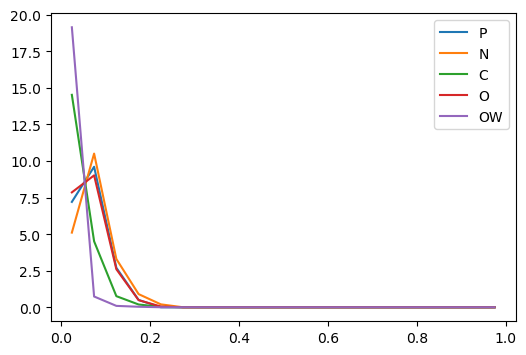

In [13]:
shifts_P = msm.structure.get_distances(molecular_system=state_init, molecular_system_2=state_end,
                                       selection=P_atoms, pairs=True, pbc=True)
shifts_N = msm.structure.get_distances(molecular_system=state_init, molecular_system_2=state_end,
                                       selection=N_atoms, pairs=True, pbc=True)
shifts_C = msm.structure.get_distances(molecular_system=state_init, molecular_system_2=state_end,
                                       selection=C_atoms, pairs=True, pbc=True)
shifts_O = msm.structure.get_distances(molecular_system=state_init, molecular_system_2=state_end,
                                       selection=O_atoms, pairs=True, pbc=True)
shifts_OW = msm.structure.get_distances(molecular_system=state_init, molecular_system_2=state_end,
                                       selection=OW_atoms, pairs=True, pbc=True)

h_P, bins = np.histogram(puw.get_value(shifts_P[0]), range=[0.0, 1.0], bins=20, density=True)
h_N, bins = np.histogram(puw.get_value(shifts_N[0]), range=[0.0, 1.0], bins=20, density=True)
h_C, bins = np.histogram(puw.get_value(shifts_C[0]), range=[0.0, 1.0], bins=20, density=True)
h_O, bins = np.histogram(puw.get_value(shifts_O[0]), range=[0.0, 1.0], bins=20, density=True)
h_OW, bins = np.histogram(puw.get_value(shifts_OW[0]), range=[0.0, 1.0], bins=20, density=True)

plt.plot(0.5*(bins[1:]+bins[:-1]), h_P, label='P')
plt.plot(0.5*(bins[1:]+bins[:-1]), h_N, label='N')
plt.plot(0.5*(bins[1:]+bins[:-1]), h_C, label='C')
plt.plot(0.5*(bins[1:]+bins[:-1]), h_O, label='O')
plt.plot(0.5*(bins[1:]+bins[:-1]), h_OW, label='OW')
plt.legend()
plt.show()

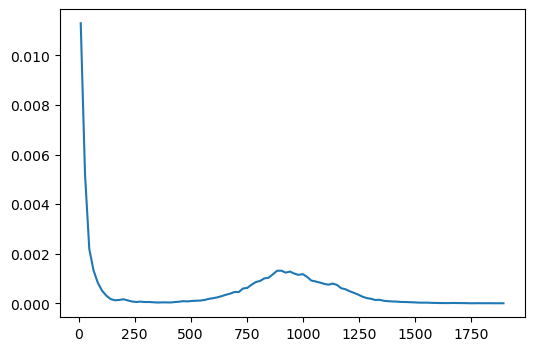

In [14]:
forces = msm.molecular_mechanics.get_forces(context, norm=True)
h, bins = np.histogram(puw.get_value(forces), bins=100, density=True)
plt.plot(0.5*(bins[1:]+bins[:-1]), h)
plt.show()

In [ ]:
#memb_antes = msm.extract(molsys, selection='molecule_type=="lipid"', to_form='molsysmt.MolSys')
#memb_despues = msm.extract([molsys, context], selection='molecule_type=="lipid"', to_form='molsysmt.MolSys')

In [ ]:
#msm.view(memb_despues)

In [15]:
coordinates = msm.get(state_end, coordinates=True)
msm.set(molsys, coordinates=coordinates)

In [16]:
msm.convert(molsys, 'memb_popc_100_stage_2_3.h5msm')

'memb_popc_100_stage_2_3.h5msm'